## SIC-Tutoria 1-11-2025

Entrenamiento de modelos (Machine Learning)

*Sofia Feijóo*

In [2]:
import numpy as np
import pandas as pd 
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# 1. Cargar data

In [4]:
path='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df= pd.read_csv(path, sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 2. Exploracion de la data
Información, Valores nulos

In [5]:
# Forma de la data
df.shape

(1599, 12)

In [6]:
# Información de la data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe(include="float64")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [8]:
# Valores nulos
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# 3. Visualizacion

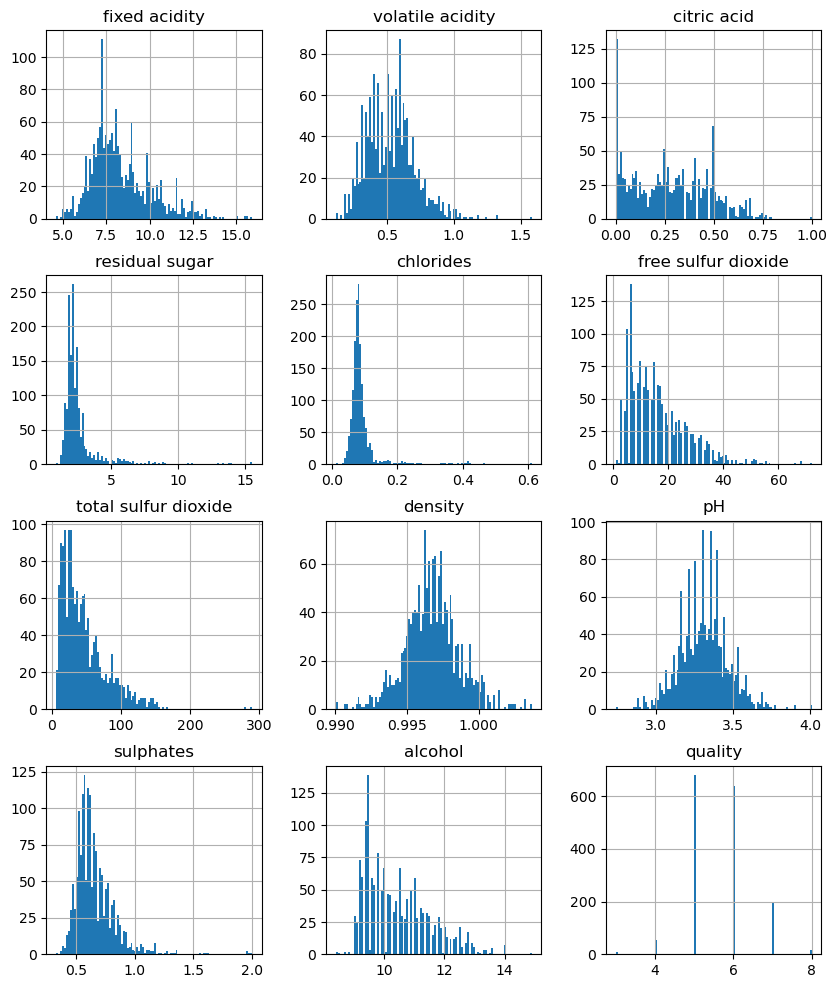

In [9]:
df.hist(bins=100, figsize=(10,12))
plt.show()

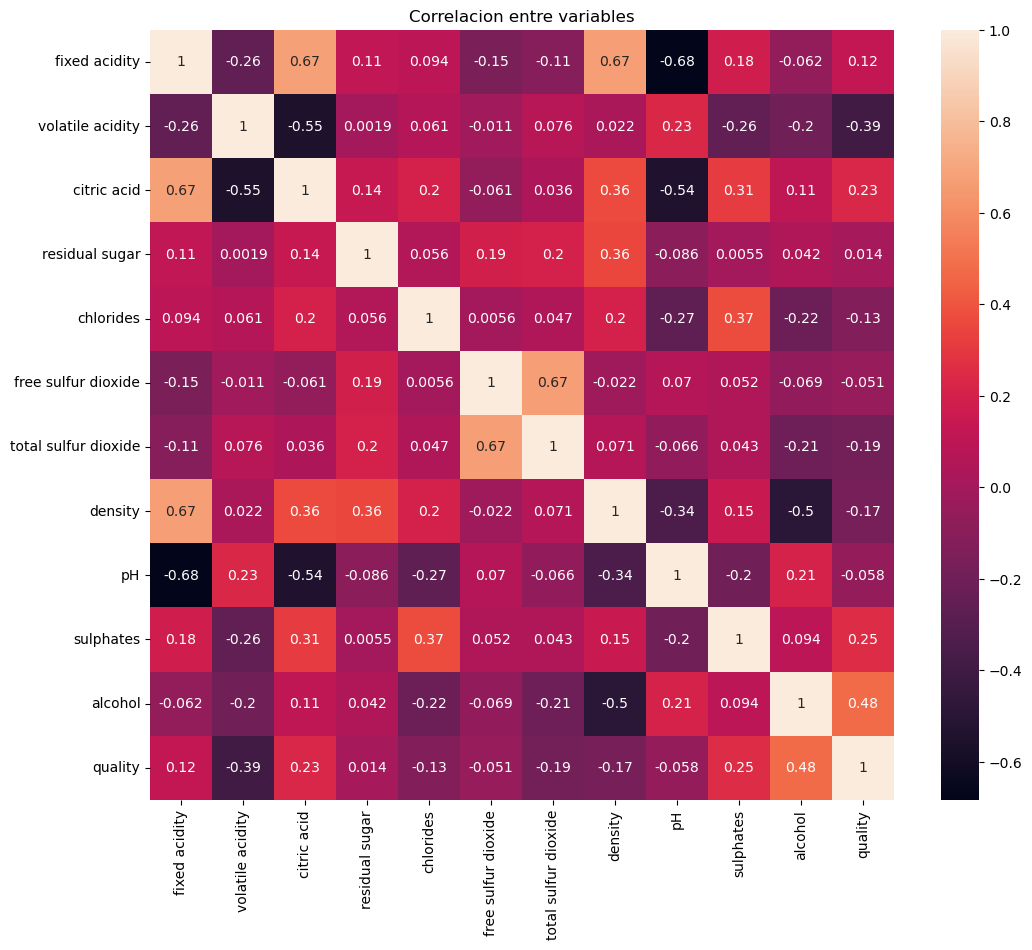

In [10]:
# Correlación entre variables
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlacion entre variables')
plt.show()

In [ ]:
# Correlacion de las variables con la calidad del vino
df.corr()['quality'].sort_values()


volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

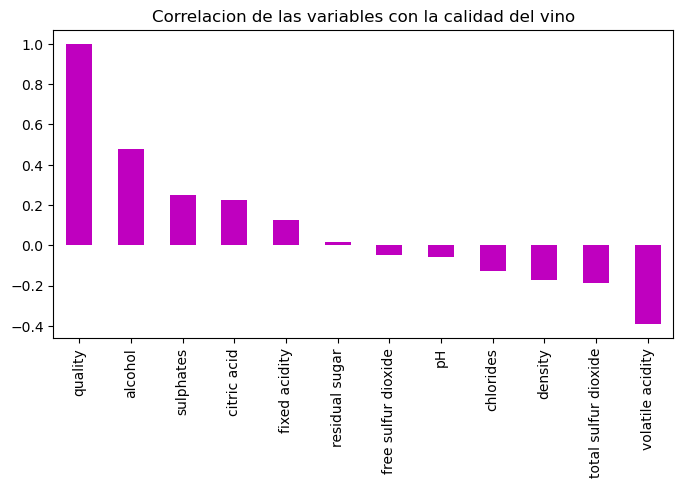

In [17]:
plt.figure(figsize=(8,4))
df.corr()["quality"].sort_values(ascending=False).plot(kind="bar", color="m")
plt.title("Correlacion de las variables con la calidad del vino")
plt.show()

# 4. Procesamiento de datos

Convertir la data a binario

In [18]:

df['quality'] = df.quality.apply(lambda x:1 if x>=7 else 0)
df['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

## 4.1 Division de los datos

In [19]:
X = df.drop('quality', axis=1)
y = df['quality']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (1279, 11)
y_train  (1279,)
X_test  (320, 11)
y_test  (320,)


# 5. Entrenamiento del modelo

## 5.1. Regresion logistica 

In [23]:
RL_model = LogisticRegression()
RL_model.fit(X_train, y_train)
y_pred = RL_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy de Regresion Logistica: ", accuracy)


Accuracy de Regresion Logistica:  0.865625


c:\Users\user\anaconda3\envs\py312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.62      0.21      0.32        47

    accuracy                           0.87       320
   macro avg       0.75      0.60      0.62       320
weighted avg       0.84      0.87      0.84       320



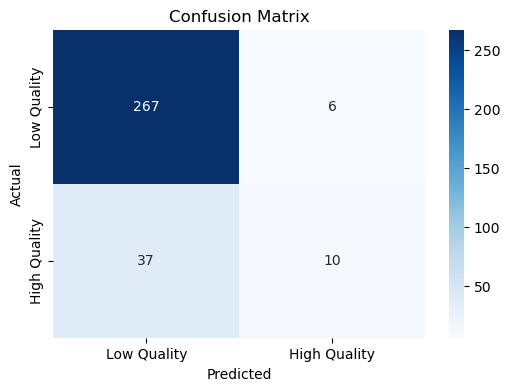

TN:  267
FN:  37
TP:  10
FP:  6


In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)   
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Quality', 'High Quality'], yticklabels=['Low Quality', 'High Quality'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Valores de la matriz de confusión
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

## 5.2. Random Forest

In [30]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy de Random Forest: ", rf_accuracy)

Accuracy de Random Forest:  0.9


In [32]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320



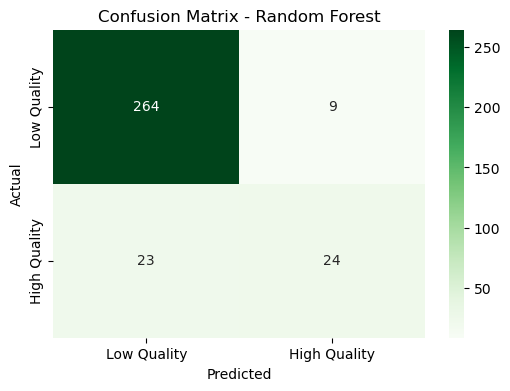

TN:  264
FN:  23
TP:  24
FP:  9


In [34]:
# matriz de confusión
cm_rf = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Low Quality', 'High Quality'], yticklabels=['Low Quality', 'High Quality'])
plt.ylabel('Actual')    
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')   
plt.show()

# Valores de la matriz de confusión
print("TN: ", cm_rf[0][0])
print("FN: ", cm_rf[1][0])
print("TP: ", cm_rf[1][1])
print("FP: ", cm_rf[0][1])

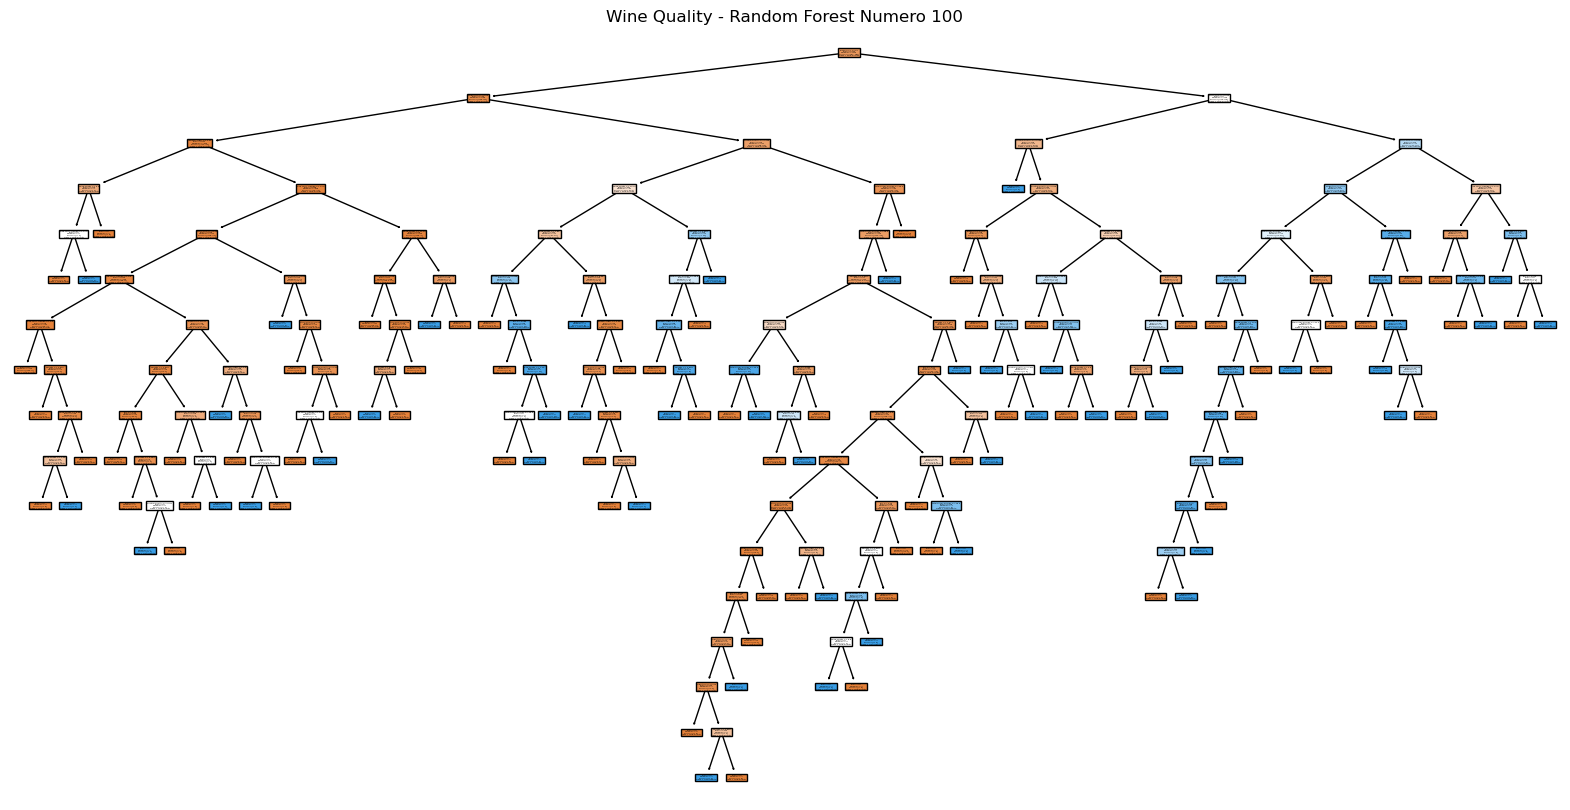

In [38]:
# mostrar el arbol de decisiones de Random Forest
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(rf_model.estimators_[99], filled=True, feature_names=X.columns, class_names=['Low Quality', 'High Quality'])
plt.title('Wine Quality - Random Forest Numero 100')
plt.show()
